In [4]:
import xarray 
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
da=xarray.open_dataset('/home/suvarchal/Software/Datasets/data/etopo05.cdf')

In [7]:
da

<xarray.Dataset>
Dimensions:    (ETOPO05_X: 4320, ETOPO05_Y: 2161)
Coordinates:
  * ETOPO05_X  (ETOPO05_X) float64 0.0 0.08333 0.1667 0.25 0.3333 0.4167 0.5 ...
  * ETOPO05_Y  (ETOPO05_Y) float64 -90.0 -89.92 -89.83 -89.75 -89.67 -89.58 ...
Data variables:
    ROSE       (ETOPO05_Y, ETOPO05_X) float64 2.81e+03 2.81e+03 2.81e+03 ...
Attributes:
    history: FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note: updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

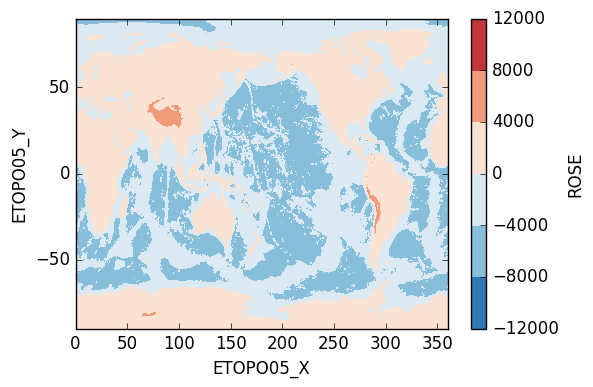

In [8]:
da.ROSE.plot.contourf()

In [20]:
ROSEsq=da.ROSE*da.ROSE
da.merge(ROSEsq.to_dataset().rename({'ROSE':'ROSEsq'}),inplace=True)

In [120]:
gpd=da.groupby_bins('ETOPO05_X',bins=180,labels=np.arange(1,360,2))
gpdmnd=gpd.mean(dim='ETOPO05_X')
gpd2=gpdmnd.groupby_bins('ETOPO05_Y',bins=91,labels=np.arange(-90,91,2))
gpdmnd2=gpd2.mean(dim='ETOPO05_Y')

In [136]:
ROSEstd=(gpdmnd2.ROSEsq-gpdmnd2.ROSE*gpdmnd2.ROSE)**(0.5)
ROSEstd=ROSEstd.rename('ROSEstd')

In [137]:
ROSEstd

<xarray.DataArray 'ROSEstd' (ETOPO05_Y_bins: 91, ETOPO05_X_bins: 180)>
array([[  29.53878688,   29.53878688,   29.53878688, ...,   44.55793669,
          44.55793669,   37.5495042 ],
       [  29.48345081,   27.45703715,   27.45703715, ...,   14.82610174,
          10.65233412,   27.15682731],
       [  12.61999396,    0.        ,   24.89667668, ...,   21.99139558,
          14.33946729,   10.36401915],
       ..., 
       [ 382.11963758,  341.63770202,  377.82700375, ...,  267.01666904,
         395.96167358,  405.01553415],
       [ 179.1290743 ,  201.80557741,  207.72395008, ...,   95.59482282,
          88.02849653,  136.41635164],
       [  42.65742845,   47.93293501,   50.6587907 , ...,   22.92391273,
          14.14698888,   31.27716393]])
Coordinates:
  * ETOPO05_X_bins  (ETOPO05_X_bins) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 ...
  * ETOPO05_Y_bins  (ETOPO05_Y_bins) int64 -90 -88 -86 -84 -82 -80 -78 -76 ...

In [141]:
gpdmnd2.merge(ROSEstd.to_dataset(),inplace=True)

<xarray.Dataset>
Dimensions:         (ETOPO05_X_bins: 180, ETOPO05_Y_bins: 91)
Coordinates:
  * ETOPO05_X_bins  (ETOPO05_X_bins) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 ...
  * ETOPO05_Y_bins  (ETOPO05_Y_bins) int64 -90 -88 -86 -84 -82 -80 -78 -76 ...
Data variables:
    ROSE            (ETOPO05_Y_bins, ETOPO05_X_bins) float64 2.762e+03 ...
    ROSEsq          (ETOPO05_Y_bins, ETOPO05_X_bins) float64 7.629e+06 ...
    ROSEstd         (ETOPO05_Y_bins, ETOPO05_X_bins) float64 29.54 29.54 ...

In [144]:
gpdmnd2.rename({'ETOPO05_Y_bins':'Latitude','ETOPO05_X_bins':'Longitude'},inplace=True)

<xarray.Dataset>
Dimensions:    (Latitude: 91, Longitude: 180)
Coordinates:
  * Longitude  (Longitude) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 ...
  * Latitude   (Latitude) int64 -90 -88 -86 -84 -82 -80 -78 -76 -74 -72 -70 ...
Data variables:
    ROSE       (Latitude, Longitude) float64 2.762e+03 2.762e+03 2.762e+03 ...
    ROSEsq     (Latitude, Longitude) float64 7.629e+06 7.629e+06 7.629e+06 ...
    ROSEstd    (Latitude, Longitude) float64 29.54 29.54 29.54 29.54 39.57 ...

In [146]:
gpdmnd2.to_netcdf('ROSE_2degstd.nc')

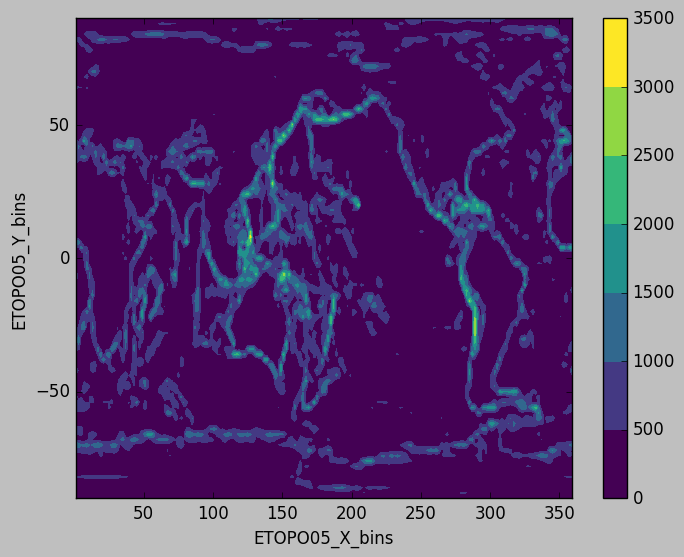

In [125]:
ROSEstd.plot.contourf(x='ETOPO05_X_bins',y='ETOPO05_Y_bins')

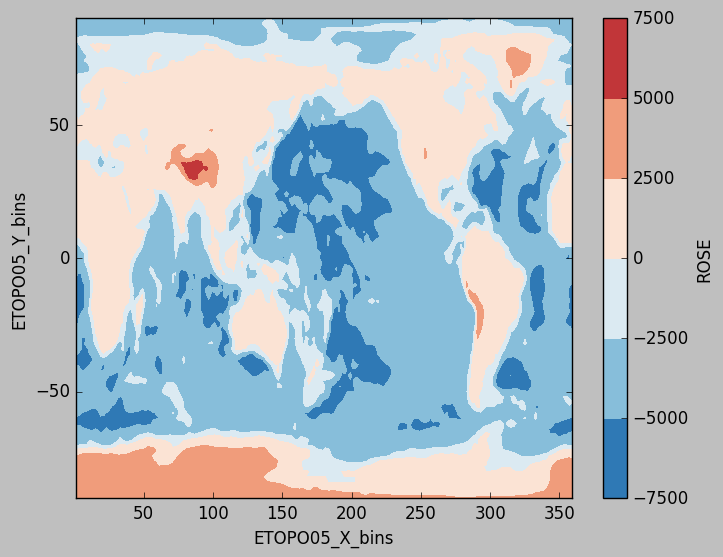

In [76]:
gpdmnd2.ROSE.plot.contourf(x='ETOPO05_X_bins',y='ETOPO05_Y_bins')

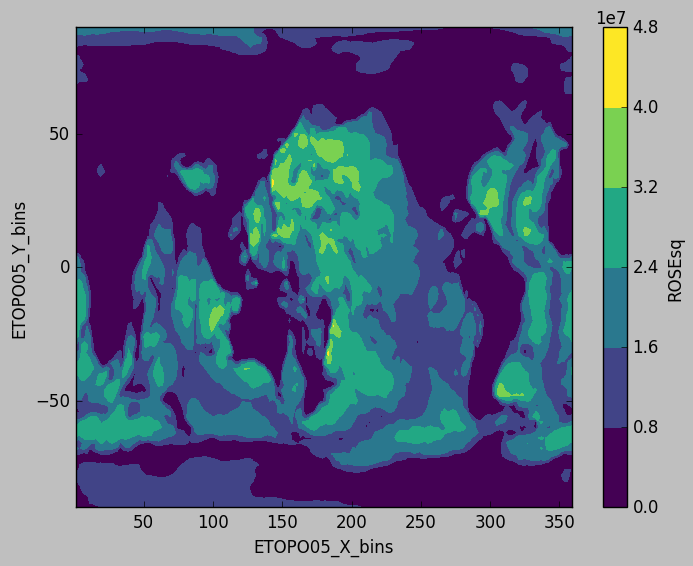

In [121]:
gpdmnd2.ROSEsq.plot.contourf(x='ETOPO05_X_bins',y='ETOPO05_Y_bins')

In [108]:
ROSEsq.rename('ROSEsq')

#gpd=da.groupby_bins('ETOPO05_X',bins=180,labels=np.arange(1,360,2))
#gpdmnd=gpd.mean(dim='ETOPO05_X')
#gpd2=gpdmnd.groupby_bins('ETOPO05_Y',bins=91,labels=np.arange(-90,91,2))
#gpdmnd2=gpd2.mean(dim='ETOPO05_Y')

<xarray.DataArray 'ROSEsq' (ETOPO05_Y: 2161, ETOPO05_X: 4320)>
array([[  7896100.,   7896100.,   7896100., ...,   7896100.,   7896100.,
          7896100.],
       [  7695076.,   7695076.,   7695076., ...,   7695076.,   7695076.,
          7695076.],
       [  7695076.,   7695076.,   7695076., ...,   7695076.,   7695076.,
          7695076.],
       ..., 
       [ 18386944.,  18386944.,  18386944., ...,  18378369.,  18378369.,
         18378369.],
       [ 18386944.,  18386944.,  18386944., ...,  18386944.,  18386944.,
         18386944.],
       [ 18404100.,  18404100.,  18404100., ...,  18404100.,  18404100.,
         18404100.]])
Coordinates:
  * ETOPO05_X  (ETOPO05_X) float64 0.0 0.08333 0.1667 0.25 0.3333 0.4167 0.5 ...
  * ETOPO05_Y  (ETOPO05_Y) float64 -90.0 -89.92 -89.83 -89.75 -89.67 -89.58 ...

In [147]:
da


<xarray.Dataset>
Dimensions:         (ETOPO05_X: 4320, ETOPO05_X_bins: 180, ETOPO05_Y: 2161, ETOPO05_Y_bins: 91)
Coordinates:
  * ETOPO05_X       (ETOPO05_X) float64 0.0 0.08333 0.1667 0.25 0.3333 ...
  * ETOPO05_Y       (ETOPO05_Y) float64 -90.0 -89.92 -89.83 -89.75 -89.67 ...
  * ETOPO05_X_bins  (ETOPO05_X_bins) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 ...
  * ETOPO05_Y_bins  (ETOPO05_Y_bins) int64 -90 -88 -86 -84 -82 -80 -78 -76 ...
Data variables:
    ROSE            (ETOPO05_Y, ETOPO05_X) float64 2.81e+03 2.81e+03 ...
    ROSEsq          (ETOPO05_Y, ETOPO05_X) float64 7.896e+06 7.896e+06 ...
    ROSEstd         (ETOPO05_Y_bins, ETOPO05_X_bins) float64 29.54 29.54 ...
Attributes:
    history: FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note: updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

In [117]:
da

<xarray.Dataset>
Dimensions:    (ETOPO05_X: 4320, ETOPO05_Y: 2161)
Coordinates:
  * ETOPO05_X  (ETOPO05_X) float64 0.0 0.08333 0.1667 0.25 0.3333 0.4167 0.5 ...
  * ETOPO05_Y  (ETOPO05_Y) float64 -90.0 -89.92 -89.83 -89.75 -89.67 -89.58 ...
Data variables:
    ROSE       (ETOPO05_Y, ETOPO05_X) float64 2.81e+03 2.81e+03 2.81e+03 ...
    ROSEsq     (ETOPO05_Y, ETOPO05_X) float64 7.896e+06 7.896e+06 7.896e+06 ...
Attributes:
    history: FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note: updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

In [96]:
#gpdmnd2['ROSE2']=gpdmnd2.rename({'ROSE':'DEM','ETOPO05_Y_bins':'Latitude','ETOPO05_X_bins':'Longitude'})
#gpdmnd2.to_netcdf('tempROSE.nc')

ValueError: cannot rename 'ETOPO05_X_bins' because it is not a variable in this dataset

In [78]:
#gpdmnd2.ETOPO05_Y_bins.name='Latitude'
#gpdmnd2.ETOPO05_Y_bins.name='Longitude'

In [92]:
gpdmnd2

<xarray.Dataset>
Dimensions:         (ETOPO05_X_bins: 180, ETOPO05_Y_bins: 91)
Coordinates:
  * ETOPO05_X_bins  (ETOPO05_X_bins) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 ...
  * ETOPO05_Y_bins  (ETOPO05_Y_bins) int64 -90 -88 -86 -84 -82 -80 -78 -76 ...
Data variables:
    ROSE            (ETOPO05_Y_bins, ETOPO05_X_bins) float64 2.762e+03 ...

In [100]:
gpdmnd2.to_dataset().to_netcdf('tempROSE.nc')

In [149]:
da.rename({'ETOPO05_Y':'Latitude','ETOPO05_X':'Longitude'},inplace=True)

<xarray.Dataset>
Dimensions:         (ETOPO05_X_bins: 180, ETOPO05_Y_bins: 91, Latitude: 2161, Longitude: 4320)
Coordinates:
  * Longitude       (Longitude) float64 0.0 0.08333 0.1667 0.25 0.3333 ...
  * Latitude        (Latitude) float64 -90.0 -89.92 -89.83 -89.75 -89.67 ...
  * ETOPO05_X_bins  (ETOPO05_X_bins) int64 1 3 5 7 9 11 13 15 17 19 21 23 25 ...
  * ETOPO05_Y_bins  (ETOPO05_Y_bins) int64 -90 -88 -86 -84 -82 -80 -78 -76 ...
Data variables:
    ROSE            (Latitude, Longitude) float64 2.81e+03 2.81e+03 2.81e+03 ...
    ROSEsq          (Latitude, Longitude) float64 7.896e+06 7.896e+06 ...
    ROSEstd         (ETOPO05_Y_bins, ETOPO05_X_bins) float64 29.54 29.54 ...
Attributes:
    history: FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note: updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

In [150]:
da.to_netcdf('ROSE_05min.nc')